In [421]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import statistics

In [422]:
#from google.colab import drive
#drive.mount('/content/drive')

In [423]:
df = pd.read_csv("Copper_Set.csv")

C:\Users\ashfaq.ahamed\AppData\Local\Temp\ipykernel_43068\274732254.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Copper_Set.csv")


## **EDA & Pre-processing**


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [425]:
df.rename(columns={'item type': 'item_type', 'quantity tons': 'quantity_tons'}, inplace=True)

In [426]:
df.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [427]:
df.isnull().sum()

id                   2
item_date            1
quantity_tons        0
customer             1
country             28
status               2
item_type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [428]:
df['country'].value_counts()

country
78.0     32084
26.0     27516
25.0     23362
27.0     21511
32.0     18658
28.0     15824
84.0     12776
77.0      9714
30.0      8702
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       819
113.0      714
89.0        92
107.0        5
Name: count, dtype: int64

In [429]:
df['country'] = df['country'].fillna(df['country'].median())
df['application'] = df['application'].fillna(df['application'].median())
df['thickness'] = df['thickness'].fillna(df['thickness'].median())
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].median())

In [430]:
df.isnull().sum()

id                   2
item_date            1
quantity_tons        0
customer             1
country              0
status               2
item_type            0
application          0
thickness            0
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        0
dtype: int64

In [431]:
df['material_ref'].value_counts().sum()

np.int64(103754)

Cleaning material_ref

In [432]:
df.sort_values('material_ref')

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
56358,52ECEF28-42E4-4FE5-9F25-1334CD966405,20210121.0,21.879115,30284855.0,40.0,Lost,S,20.0,5.00,1250.0,-,640405,20210501.0,916.0
56205,B6C16E70-7EA9-4695-9849-7467A7F9134F,20210121.0,18.260646,30225641.0,40.0,Revised,S,10.0,6.00,1500.0,-,640405,20210501.0,849.0
3705,DEB85516-A62E-4A20-88AD-56171F161194,20210326.0,98.207771,30206401.0,27.0,Won,S,59.0,2.37,1125.0,-,1670798778,20210701.0,1123.0
45163,4D3E2AFF-C7BA-4B87-A5EA-26FD2934A1EA,20210203.0,38.979512,30225641.0,40.0,Won,S,10.0,5.00,2000.0,-,640405,20210501.0,817.0
45191,08B7DB8D-20CE-47D8-AB0C-9E6BBFF2379A,20210203.0,23.875215,30225641.0,40.0,Revised,S,10.0,6.00,1500.0,-,640405,20210501.0,847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181652,F5EC467C-300D-4E85-BEF7-51999E0B7CA7,20200702.0,1.672378945,30155929.0,25.0,Won,W,41.0,0.58,1220.0,NaN,611993,20200701.0,776.0
181653,497F5391-F450-4B49-870D-9B62A0274DD6,20200702.0,50.6469069,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,20200701.0,763.0
181654,04701946-E052-44C9-BCB5-C6AFC2EBFF7E,20200702.0,3.769829492,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,20200701.0,773.0
181655,D9E161D4-ACE6-47B5-ADB0-71FB3E95BF9A,20200702.0,220.8752724,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,20200701.0,766.0


In [433]:
df['material_ref'] = df['material_ref'].replace('None', np.nan)

In [434]:
df.replace("-", np.nan, inplace=True)
df.replace(".", np.nan, inplace=True)
df.replace('', np.nan, inplace=True)
df.replace('  ', np.nan, inplace=True)


In [435]:
103754*.75

77815.5

In [436]:
x = df['material_ref'].value_counts()
x2 = pd.DataFrame(x)
material_ref_reset = x2.reset_index()


In [437]:
x2

,count
material_ref,
DX51D+Z,922
G9010,856
DC01 RED.FLAT KUCHNIA EKO 2.2,777
DC01,725
G9006,671
...,...
202006170014.IO.1.1,1
202006260002.IO.1.1,1
202006250011.IO.1.1,1


In [438]:
material_ref_reset

,material_ref,count
0,DX51D+Z,922
1,G9010,856
2,DC01 RED.FLAT KUCHNIA EKO 2.2,777
3,DC01,725
4,G9006,671
...,...,...
16556,202006170014.IO.1.1,1
16557,202006260002.IO.1.1,1
16558,202006250011.IO.1.1,1
16559,19076 +/- RAL 9010,1


In [439]:
material_ref_reset.columns = ['material_ref','counts']

In [440]:
type(material_ref_reset)

pandas.core.frame.DataFrame

In [441]:
material_ref_reset.head(5500).sum() #79575

material_ref    DX51D+ZG9010DC01 RED.FLAT KUCHNIA EKO 2.2DC01G...
counts                                                      79575
dtype: object

In [442]:
material_ref_reset.head(5500) #mat_ref less than 5 counts not considered for spread!

,material_ref,counts
0,DX51D+Z,922
1,G9010,856
2,DC01 RED.FLAT KUCHNIA EKO 2.2,777
3,DC01,725
4,G9006,671
...,...,...
5495,0000000000000000000000000000000001004127,5
5496,06668/06669/35/35/1240/0.74,5
5497,06775/7035/35/35/1240/0.62,5
5498,0000000000000000000000000000002101750680,5


In [443]:
material_ref_reset.head(5500).sum() #2-sig

material_ref    DX51D+ZG9010DC01 RED.FLAT KUCHNIA EKO 2.2DC01G...
counts                                                      79575
dtype: object

In [444]:
material_ref_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16561 entries, 0 to 16560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   material_ref  16561 non-null  object
 1   counts        16561 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 258.9+ KB


In [445]:
material_ref_type = material_ref_reset['material_ref'].unique()

In [446]:
material_ref_type

array(['DX51D+Z', 'G9010', 'DC01 RED.FLAT KUCHNIA EKO 2.2', ...,
       '202006250011.IO.1.1', '19076 +/- RAL 9010',
       '0000000000000000000000000000000000117231'], dtype=object)

In [447]:
material_ref_type
material_ref_type_list = []
for i in material_ref_type:
  material_ref_type_list.append(i)

In [448]:
material_ref_toplist = material_ref_type_list[:5500] #top 5500

In [449]:
material_ref_toplist

['DX51D+Z',
 'G9010',
 'DC01 RED.FLAT KUCHNIA EKO 2.2',
 'DC01',
 'G9006',
 'G9002',
 'G7016',
 'S235JR+AR-CL1',
 'K DX51D+Z PROFILES',
 'NEQ1 S355J2+N',
 'DX51D+Z275 EKO 2.2',
 'A9010',
 'CLS05S700MC/000094',
 'S220GD+Z',
 'S235JR+N-CL1',
 'DES1 DD11-CL1AMFCE',
 'S355MC-CAT_A 3.1',
 'typical item',
 'DX51D+Z275',
 'DC01-CAT_A',
 'S355J2+N-CL1',
 'DX51D+Z_A',
 'S235JR+AR_CL1',
 'S350GD+ZM',
 'S220GD+Z275 MAC_GALV EDGES',
 'PI_S235JR-CL1',
 'CONSIGNMENT STOCK',
 'G7035',
 'DC04',
 'BOB',
 'DC01+ZV25/25',
 'S235JR+AR LARG SUP 1500 CVLT',
 '81420726363F35CSA',
 'DC01+ZE',
 'DX51D+ZM',
 'HC220CA',
 'typical basket',
 'NANS3JRGS',
 'DC04 EKO 3.1',
 'DEQ1 P295GH',
 'ACCESS STD SPAIN',
 'NES1 S235JR',
 '0000000000000000000000000000000020000069',
 '002-06-2017/US/Serwistal',
 'DD11-CL1',
 'G9007',
 'DD11-CAT_A',
 '2_S235JR+AR-CL1',
 'S275JR+AR-CL1',
 'G3000',
 '405029489B2F60HEA',
 'DX51D+Z A',
 'DX51D+Z100 EKO 2.2',
 'BL_S355J2+N-CL1',
 'DD11 EKO',
 'S355MC',
 'DES1 S235JR',
 'DC01 EKO 2.2',


In [450]:
df.sort_values('material_ref')

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
9728,C0DF7754-1959-4178-B1F4-F9A031CA5BEA,20210319.0,33.344994,30264704.0,32.0,Won,S,29.0,0.35,1050.0,"0,35X1050",164141591,20210701.0,1266.0
87113,07DDB4D9-2A50-4955-A024-8845CBD55B38,20201202.0,23.434117,30264704.0,32.0,Won,S,29.0,0.35,1050.0,"0,35X1050",164141591,20210401.0,1058.0
87117,6C1666E5-F6C1-43AA-9317-B8EA96B46CB0,20201202.0,40.973349,30264704.0,32.0,Won,S,29.0,0.37,1260.0,"0,37X1260",164141591,20210401.0,1054.0
67187,5424C5D8-C5E3-461E-9782-1D91CA9326BF,20210108.0,38.257129,30264704.0,32.0,Won,S,29.0,0.37,1260.0,"0,37X1260",164141591,20210401.0,1051.0
9730,C0E2E5A0-32A4-4445-94BB-9D55E5A44C41,20210319.0,39.163641,30264704.0,32.0,Won,S,29.0,0.37,1260.0,"0,37X1260",164141591,20210701.0,1263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181652,F5EC467C-300D-4E85-BEF7-51999E0B7CA7,20200702.0,1.672378945,30155929.0,25.0,Won,W,41.0,0.58,1220.0,NaN,611993,20200701.0,776.0
181653,497F5391-F450-4B49-870D-9B62A0274DD6,20200702.0,50.6469069,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,20200701.0,763.0
181654,04701946-E052-44C9-BCB5-C6AFC2EBFF7E,20200702.0,3.769829492,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,20200701.0,773.0
181655,D9E161D4-ACE6-47B5-ADB0-71FB3E95BF9A,20200702.0,220.8752724,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,20200701.0,766.0


In [451]:
df["material_ref"].isnull().sum()

np.int64(77953)

In [452]:
df['material_ref_bias'] = df['material_ref'].isnull().apply(lambda x : not(x))
df['material_ref_bias'] = df['material_ref_bias'].astype(int)

In [453]:
df["material_ref_bias"].describe()

count    181673.000000
mean          0.570916
std           0.494947
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: material_ref_bias, dtype: float64

In [454]:
df = df.fillna(value=np.nan)

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181671 non-null  object 
 1   item_date          181672 non-null  float64
 2   quantity_tons      181673 non-null  object 
 3   customer           181672 non-null  float64
 4   country            181673 non-null  float64
 5   status             181671 non-null  object 
 6   item_type          181673 non-null  object 
 7   application        181673 non-null  float64
 8   thickness          181673 non-null  float64
 9   width              181673 non-null  float64
 10  material_ref       103720 non-null  object 
 11  product_ref        181673 non-null  int64  
 12  delivery date      181672 non-null  float64
 13  selling_price      181673 non-null  float64
 14  material_ref_bias  181673 non-null  int64  
dtypes: float64(8), int64(2), object(5)
memory usage: 20

In [456]:
df.isnull().sum()

id                       2
item_date                1
quantity_tons            0
customer                 1
country                  0
status                   2
item_type                0
application              0
thickness                0
width                    0
material_ref         77953
product_ref              0
delivery date            1
selling_price            0
material_ref_bias        0
dtype: int64

In [457]:
df['status'].value_counts()

status
Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [458]:
values = ['Not lost for AM', 'Revised', 'To be approved', 'Draft','Offered','Offerable','Wonderful']

#drop rows that contain any value in the list
df = df[df.status.isin(values) == False]

In [459]:
from datetime import date

def dayscal(deliver_date, item_date):
  """
  Calculates the difference in days between two dates.
  Handles missing values and potential formatting issues.

  Args:
    deliver_date: Delivery date (expected to be a number or a string).
    item_date: Item date (expected to be a number or a string).

  Returns:
    The difference in days between the two dates, or NaN if either date is invalid.
  """
  try:
    # Convert to strings and remove decimal part if present
    a1 = str(deliver_date).split(".")[0]
    b1 = str(item_date).split(".")[0]

    # Extract year, month, and day, handling potential empty strings
    d_year = int(a1[:4]) if a1[:4].strip() else None
    d_month = int(a1[4:6]) if a1[4:6].strip() else None
    d_date = int(a1[-2:]) if a1[-2:].strip() else None

    i_year = int(b1[:4]) if b1[:4].strip() else None
    i_month = int(b1[4:6]) if b1[4:6].strip() else None
    i_date = int(b1[-2:]) if b1[-2:].strip() else None

    # Check if all components are valid before creating date objects
    if all([d_year, d_month, d_date, i_year, i_month, i_date]):
      a = date(d_year, d_month, d_date)
      b = date(i_year, i_month, i_date)
      return (a - b).days
    else:
      return float('nan')  # Return NaN if any component is invalid

  except (ValueError, TypeError):
    return float('nan')  # Return NaN for any other error

# Apply the function to the DataFrame
df['delivery_days'] = df.apply(lambda row: dayscal(row['delivery date'], row['item_date']), axis=1)

In [460]:
df['delivery_days'].value_counts()

delivery_days
 76.0     3124
 28.0     2726
 30.0     2725
 35.0     1984
 24.0     1889
          ... 
-131.0       1
-285.0       1
-105.0       1
-110.0       1
-184.0       1
Name: count, Length: 367, dtype: int64

In [461]:
df['delivery_days'].isnull().sum()

np.int64(5)

In [462]:
df = df.dropna()
df['delivery_days'].isnull().sum()

np.int64(0)

In [463]:
df['delivery_days'] = df.apply(lambda row: abs(row['delivery_days']), axis=1)

C:\Users\ashfaq.ahamed\AppData\Local\Temp\ipykernel_43068\1301996648.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df['delivery_days'].value_counts()[:80].sort_values().plot(kind='bar')


<Axes: xlabel='delivery_days'>

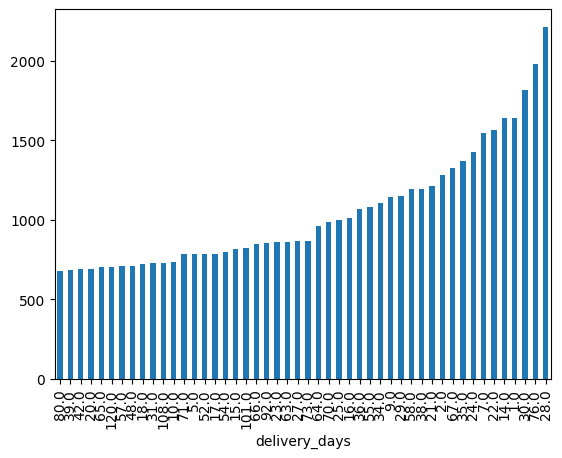

In [464]:
df['delivery_days'].value_counts()[:80].sort_values().plot(kind='bar')

In [465]:
result = df.groupby(['status', 'item_type']).size().reset_index(name='count')
print(result)

  status item_type  count
0   Lost    Others     22
1   Lost        PL     39
2   Lost         S   6732
3   Lost         W   6116
4    Won       IPL     27
5    Won    Others    433
6    Won        PL   3990
7    Won         S  17689
8    Won         W  52113
9    Won        WI    465


In [466]:
df['item_date'].value_counts()

item_date
20201202.0    1619
20210304.0    1389
20200929.0    1226
20201216.0    1180
20201124.0    1108
              ... 
20210227.0       1
20201206.0       1
20201122.0       1
20200829.0       1
20200801.0       1
Name: count, Length: 231, dtype: int64

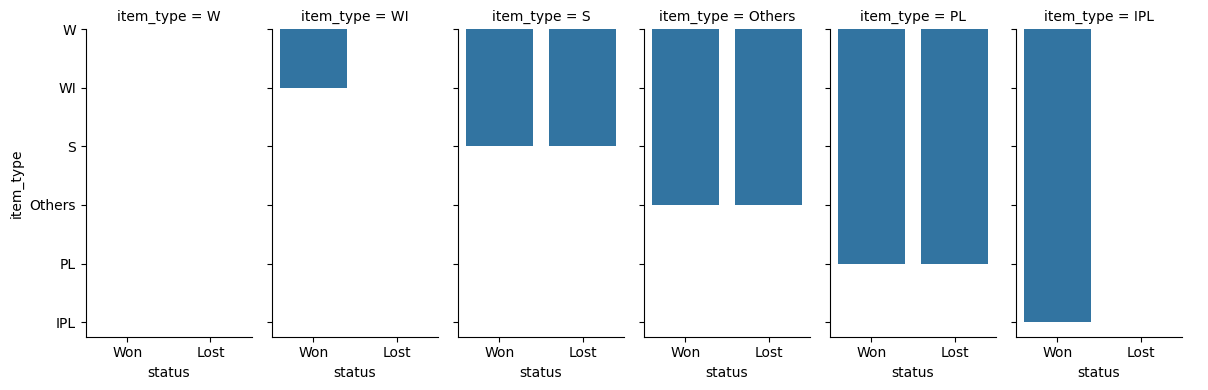

In [467]:
sns.catplot(
    df, kind="bar",
    x="status", y="item_type", col="item_type",
    height=4, aspect=.5,
)

In [468]:
df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,material_ref_bias,delivery_days
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,1,91.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,1,0.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,1,90.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,1,90.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,1,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00,1,1.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00,1,1.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00,1,1.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00,1,1.0


In [469]:
df['material_ref'] = df['material_ref'].replace('None', np.nan)

In [470]:
i = 0
j = 0
def filltrim2(x):
  if pd.isna(x) or x == "None":
    global i, j
    val = material_ref_toplist[i]
    if i >= len(material_ref_toplist)-1:
      j +=  i
      i=0
    else:
      i += 1
      return val
  else:
    return x


df['material_ref'] = df['material_ref'].apply(filltrim2)
print(j, "values filled in material_ref column")

0 values filled in material_ref column


In [471]:
df.replace('', np.nan, inplace=True)
i = 0
j = 0
def filltrim2(x):
  if pd.isna(x) or x == "None":
    global i, j
    val = material_ref_toplist[i]
    if i >= len(material_ref_toplist)-1:
      j +=  i
      i=0
    else:
      i += 1
      return val
  else:
    return x


df['material_ref'] = df['material_ref'].apply(filltrim2)
print(j, "values filled in material_ref column")

0 values filled in material_ref column


In [472]:
df.query('material_ref.isnull()')

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,material_ref_bias,delivery_days


In [473]:
df = df.dropna()

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87626 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 87626 non-null  object 
 1   item_date          87626 non-null  float64
 2   quantity_tons      87626 non-null  object 
 3   customer           87626 non-null  float64
 4   country            87626 non-null  float64
 5   status             87626 non-null  object 
 6   item_type          87626 non-null  object 
 7   application        87626 non-null  float64
 8   thickness          87626 non-null  float64
 9   width              87626 non-null  float64
 10  material_ref       87626 non-null  object 
 11  product_ref        87626 non-null  int64  
 12  delivery date      87626 non-null  float64
 13  selling_price      87626 non-null  float64
 14  material_ref_bias  87626 non-null  int64  
 15  delivery_days      87626 non-null  float64
dtypes: float64(9), int64(2), o

In [475]:
df.isnull().sum()

id                   0
item_date            0
quantity_tons        0
customer             0
country              0
status               0
item_type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
material_ref_bias    0
delivery_days        0
dtype: int64

In [476]:
#sns.boxplot(x='item_type',y='material_ref', data=df)
#plt.show()

In [477]:
df['id'].value_counts() #label encoding


id
AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC    1
EC06F063-9DF0-440C-8764-0B0C05A4F6AE    1
4E5F4B3D-DDDF-499D-AFDE-A3227EC49425    1
E140FF1B-2407-4C02-A0DD-780A093B1158    1
F8D507A0-9C62-4EFE-831E-33E1DA53BB50    1
                                       ..
16253654-FBDA-4252-886C-55F8ACF2B08C    1
E1693AB6-73EB-4F3F-81E8-F5E4DF0C70B7    1
A0E5D67D-A2E9-4401-B95E-277B562A4923    1
6B864D16-1C11-40D3-B4E3-917B68946F32    1
E7039921-5DE1-4FD1-93A3-C25F9C389B82    1
Name: count, Length: 87626, dtype: int64

In [478]:
df['product_ref'].value_counts() #label encoding


product_ref
611993        22357
164141591     14859
640665        14285
628377        11217
1670798778     9945
1668701718     4855
640405         2676
1671863738     2071
1332077137     1600
1693867550      924
1671876026      727
1668701376      586
628117          271
1282007633      173
1668701698      160
164337175       158
1722207579      125
1693867563      123
628112          117
1721130331       99
611728           70
640400           59
1665572374       44
164336407        36
1690738206       35
1668701725       27
611733           24
1665584642        2
929423819         1
Name: count, dtype: int64

In [479]:
df['thickness'].value_counts() #ordinal encoding

thickness
3.000     6135
0.500     6042
2.000     5836
1.500     5361
1.000     4512
          ... 
2.075        1
7.610        1
19.050       1
13.320       1
3.820        1
Name: count, Length: 480, dtype: int64

In [480]:
df['material_ref'].value_counts()#label encoding

material_ref
DX51D+Z                          851
DC01 RED.FLAT KUCHNIA EKO 2.2    776
G9010                            623
DC01                             600
G9006                            520
                                ... 
2X53A100L6FSA                      1
2340B100L6FSA                      1
1260B100L6FSL                      1
C0103539                           1
JLVDAN111815                       1
Name: count, Length: 15818, dtype: int64

In [481]:
df['application'].value_counts() #label encoding

application
10.0    36985
41.0    23637
15.0     6879
59.0     5438
42.0     3310
56.0     2108
28.0     1212
25.0     1198
27.0     1078
40.0      893
26.0      822
29.0      674
66.0      610
79.0      570
3.0       417
20.0      381
22.0      239
4.0       226
39.0      172
68.0      169
38.0      143
67.0      105
58.0       83
5.0        71
69.0       69
65.0       67
70.0       38
19.0       29
99.0        2
2.0         1
Name: count, dtype: int64

In [482]:
df['status'].value_counts() #label encoding

status
Won     74717
Lost    12909
Name: count, dtype: int64

In [483]:
df['quantity_tons'].value_counts()

quantity_tons
406.6865384    1
54.151139      1
768.024839     1
386.127949     1
202.411065     1
              ..
53.581034      1
20.807114      1
75.124394      1
35.310332      1
32.235317      1
Name: count, Length: 87626, dtype: int64

In [484]:
df['country'].value_counts()

country
78.0     17365
25.0     14286
32.0     11108
26.0     10483
28.0      9742
27.0      8276
84.0      5506
77.0      5099
30.0      4788
80.0       321
38.0       201
79.0       176
113.0      114
39.0        91
40.0        68
107.0        2
Name: count, dtype: int64

In [485]:
df['customer'].value_counts()

customer
30201846.0    2765
30202938.0    2531
30161088.0    2514
30157111.0    2436
30205312.0    1977
              ... 
30403536.0       1
30229958.0       1
30395031.0       1
30356490.0       1
30280170.0       1
Name: count, Length: 786, dtype: int64

In [486]:
random_state = np.random.RandomState(42) #model ID
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(df[['width']])

print(model.get_params())

score = pd.DataFrame()
score['scores'] = model.decision_function(df[['width']])

score['anomaly_score'] = model.predict(df[['width']])

score[score['anomaly_score']==-1].head()

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x19BA145E840, 'verbose': 0, 'warm_start': False}


,scores,anomaly_score
2,-0.033965,-1
4,-0.070820,-1
13,-0.031722,-1
19,-0.005583,-1
20,-0.031382,-1


In [487]:
df = df.drop(df[df["quantity_tons"] == 'e'].index)
df['selling_price'] = df['selling_price'].apply(lambda x : float(x))
df['quantity_tons'] = df['quantity_tons'].apply(lambda x : float(x))


In [488]:
df['quantity_tons'].value_counts()

quantity_tons
406.686538    1
54.151139     1
768.024839    1
386.127949    1
202.411065    1
             ..
53.581034     1
20.807114     1
75.124394     1
35.310332     1
32.235317     1
Name: count, Length: 87626, dtype: int64

In [489]:
df['material_ref'] = df['material_ref'].apply(lambda x : str(x))
df['material_ref'] = df['material_ref'].apply(lambda x : x.lstrip("0"))


In [490]:
df['material_ref'].value_counts()

material_ref
DX51D+Z                          851
DC01 RED.FLAT KUCHNIA EKO 2.2    776
G9010                            623
DC01                             600
G9006                            520
                                ... 
2X53A100L6FSA                      1
1100017210                         1
S550GD+ZM                          1
2101203255                         1
2101204080                         1
Name: count, Length: 15817, dtype: int64

In [491]:

df.replace('', np.nan, inplace=True)
i = 0
j = 0
def filltrim2(x):
  if pd.isna(x) or x == "None":
    global i, j
    val = material_ref_toplist[i]
    if i >= len(material_ref_toplist)-1:
      j +=  i
      i=0
    else:
      i += 1
      return val
  else:
    return x


df['material_ref'] = df['material_ref'].apply(filltrim2)
print(j, "values filled in material_ref column")
print(df.isnull().sum())

0 values filled in material_ref column
id                   0
item_date            0
quantity_tons        0
customer             0
country              0
status               0
item_type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
material_ref_bias    0
delivery_days        0
dtype: int64


In [492]:
if df['material_ref'].isin(['']).any().any():
    print(" '' exists in the DataFrame")
else:
    print(" '' does not exist in the DataFrame")

 '' does not exist in the DataFrame


In [493]:
df.isnull().sum()

id                   0
item_date            0
quantity_tons        0
customer             0
country              0
status               0
item_type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
material_ref_bias    0
delivery_days        0
dtype: int64

In [494]:
df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,material_ref_bias,delivery_days
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,1,91.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00,1,0.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,1,90.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,1,90.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,1,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00,1,1.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00,1,1.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00,1,1.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,20200701.0,601.00,1,1.0


### **Encoding**

In [495]:
le = LabelEncoder()
le.fit(df['status'])
df['status'] = le.transform(df['status'])

In [496]:
le_col = ['product_ref' , 'country', 'application', 'customer', 'item_type', 'material_ref']
oe_col = ['width', 'thickness']
label_encoders = {}
le_col_val = {}

for col in le_col:
  le = LabelEncoder()
  le.fit(df[col])

  le_col_val[col] = dict(zip(le.classes_, le.transform(le.classes_)))

  label_encoders[col] = le#save the model

  df[col] = le.transform(df[col])
  print(label_encoders[col].classes_)
  #print(le_col_val)


[    611728     611733     611993     628112     628117     628377
     640400     640405     640665  164141591  164336407  164337175
  929423819 1282007633 1332077137 1665572374 1665584642 1668701376
 1668701698 1668701718 1668701725 1670798778 1671863738 1671876026
 1690738206 1693867550 1693867563 1721130331 1722207579]
[ 25.  26.  27.  28.  30.  32.  38.  39.  40.  77.  78.  79.  80.  84.
 107. 113.]
[ 2.  3.  4.  5. 10. 15. 19. 20. 22. 25. 26. 27. 28. 29. 38. 39. 40. 41.
 42. 56. 58. 59. 65. 66. 67. 68. 69. 70. 79. 99.]
[30147616. 30147722. 30147800. 30147802. 30147848. 30148135. 30148496.
 30148586. 30148629. 30148743. 30148806. 30148822. 30148826. 30148849.
 30148901. 30148907. 30149080. 30149089. 30149105. 30149129. 30149413.
 30149530. 30150133. 30152417. 30153176. 30153509. 30153510. 30153767.
 30153956. 30153963. 30154020. 30154025. 30155835. 30155926. 30155929.
 30156053. 30156170. 30156261. 30156308. 30156496. 30156795. 30156842.
 30156952. 30157033. 30157092. 30157104. 30

In [497]:
ordinal_encoders = {}
mapping = {}

for col in oe_col:

  oe = OrdinalEncoder()

  oe.fit(df[[col]])

  ordinal_encoders[col] = oe #save the model

  df[col] = oe.transform(df[[col]])
  categories = oe.categories_[0]  # Get categories for the first column

  mapping[col] = {value: idx for idx, value in enumerate(categories)}
  print(mapping[col])

{np.float64(20.5): 0, np.float64(29.0): 1, np.float64(40.0): 2, np.float64(54.0): 3, np.float64(70.0): 4, np.float64(82.5): 5, np.float64(84.0): 6, np.float64(89.7): 7, np.float64(100.5): 8, np.float64(101.5): 9, np.float64(105.0): 10, np.float64(112.0): 11, np.float64(115.0): 12, np.float64(120.0): 13, np.float64(125.0): 14, np.float64(128.8): 15, np.float64(129.5): 16, np.float64(131.5): 17, np.float64(160.0): 18, np.float64(162.0): 19, np.float64(172.5): 20, np.float64(177.0): 21, np.float64(179.5): 22, np.float64(188.0): 23, np.float64(195.0): 24, np.float64(196.3): 25, np.float64(197.0): 26, np.float64(198.0): 27, np.float64(203.5): 28, np.float64(209.0): 29, np.float64(209.5): 30, np.float64(210.0): 31, np.float64(212.0): 32, np.float64(217.3): 33, np.float64(220.0): 34, np.float64(223.0): 35, np.float64(227.0): 36, np.float64(230.0): 37, np.float64(232.0): 38, np.float64(233.0): 39, np.float64(234.0): 40, np.float64(234.8): 41, np.float64(235.0): 42, np.float64(240.0): 43, np.fl

In [498]:
cols = ['id','item_date','delivery date' ]
df = df.drop(cols, axis=1)

In [499]:
df

,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,selling_price,material_ref_bias,delivery_days
0,54.151139,38,3,1,4,4,175.0,983.0,10043,21,854.00,1,91.0
1,768.024839,225,0,1,4,17,61.0,700.0,1451,19,1047.00,1,0.0
2,386.127949,29,4,1,5,12,15.0,443.0,14135,5,644.33,1,90.0
3,202.411065,664,5,1,3,21,193.0,806.0,10311,19,768.00,1,90.0
4,785.526262,303,3,1,4,4,301.0,1205.0,4119,8,577.00,1,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,172,0,1,4,17,79.0,710.0,464,9,591.00,1,1.0
181669,208.086469,172,0,1,4,17,77.0,983.0,296,9,589.00,1,1.0
181670,4.235594,172,0,1,4,17,53.0,740.0,688,9,619.00,1,1.0
181671,-2000.000000,172,0,1,4,17,67.0,740.0,499,9,601.00,1,1.0


In [500]:
df

,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,selling_price,material_ref_bias,delivery_days
0,54.151139,38,3,1,4,4,175.0,983.0,10043,21,854.00,1,91.0
1,768.024839,225,0,1,4,17,61.0,700.0,1451,19,1047.00,1,0.0
2,386.127949,29,4,1,5,12,15.0,443.0,14135,5,644.33,1,90.0
3,202.411065,664,5,1,3,21,193.0,806.0,10311,19,768.00,1,90.0
4,785.526262,303,3,1,4,4,301.0,1205.0,4119,8,577.00,1,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,172,0,1,4,17,79.0,710.0,464,9,591.00,1,1.0
181669,208.086469,172,0,1,4,17,77.0,983.0,296,9,589.00,1,1.0
181670,4.235594,172,0,1,4,17,53.0,740.0,688,9,619.00,1,1.0
181671,-2000.000000,172,0,1,4,17,67.0,740.0,499,9,601.00,1,1.0


### **Data Visualization & Analysis**

In [501]:
df.isnull().sum()

quantity_tons        0
customer             0
country              0
status               0
item_type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
selling_price        0
material_ref_bias    0
delivery_days        0
dtype: int64

In [502]:
df.shape

(87626, 13)

In [503]:
df['selling_price']

0          854.00
1         1047.00
2          644.33
3          768.00
4          577.00
           ...   
181668     591.00
181669     589.00
181670     619.00
181671     601.00
181672     607.00
Name: selling_price, Length: 87626, dtype: float64

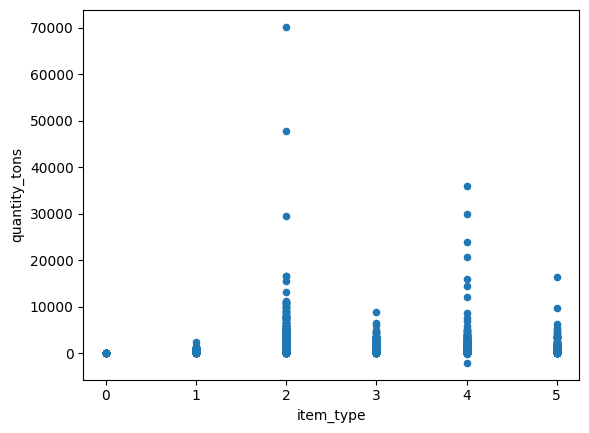

In [504]:
df.plot(kind='scatter', x='item_type', y='quantity_tons')
plt.show()

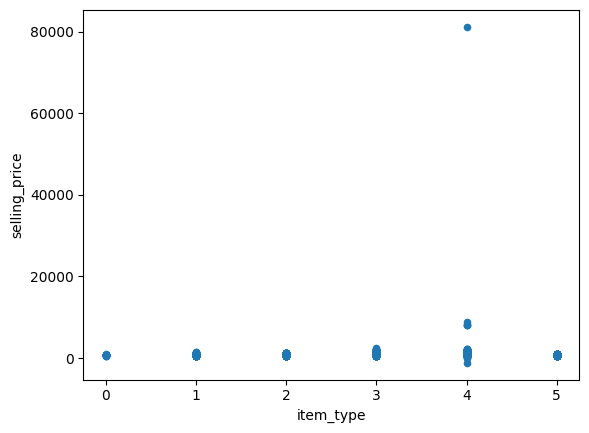

In [505]:
df.plot(kind='scatter', x='item_type', y='selling_price')
plt.show()

In [506]:
df['selling_price'].describe()

count    87626.000000
mean       819.943082
std        339.702147
min      -1160.000000
25%        669.000000
50%        806.000000
75%        940.000000
max      81236.140000
Name: selling_price, dtype: float64

In [507]:
df

,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,selling_price,material_ref_bias,delivery_days
0,54.151139,38,3,1,4,4,175.0,983.0,10043,21,854.00,1,91.0
1,768.024839,225,0,1,4,17,61.0,700.0,1451,19,1047.00,1,0.0
2,386.127949,29,4,1,5,12,15.0,443.0,14135,5,644.33,1,90.0
3,202.411065,664,5,1,3,21,193.0,806.0,10311,19,768.00,1,90.0
4,785.526262,303,3,1,4,4,301.0,1205.0,4119,8,577.00,1,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,172,0,1,4,17,79.0,710.0,464,9,591.00,1,1.0
181669,208.086469,172,0,1,4,17,77.0,983.0,296,9,589.00,1,1.0
181670,4.235594,172,0,1,4,17,53.0,740.0,688,9,619.00,1,1.0
181671,-2000.000000,172,0,1,4,17,67.0,740.0,499,9,601.00,1,1.0


In [508]:
#df = df.drop(df[df["item_type"] == "Others"].index)
#df = df.drop(df[df["item_type"] == "SLAWR"].index)

df = df.drop(df[df["quantity_tons"] > float(1000)].index)
df = df.drop(df[df["quantity_tons"] < float(1)].index)

df = df.drop(df[df["selling_price"] > float(1200)].index)
df = df.drop(df[df["selling_price"] < float(450)].index)

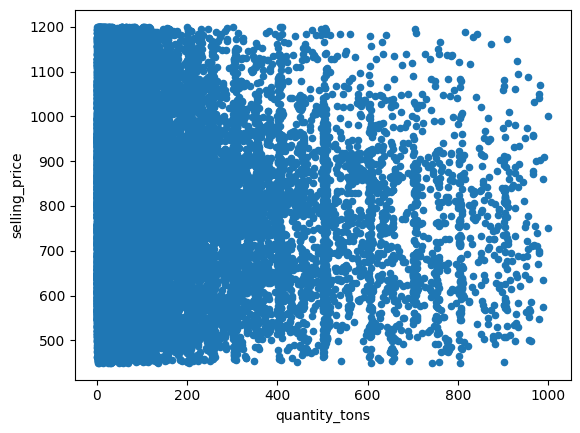

In [509]:
df.plot(kind='scatter', x='quantity_tons', y='selling_price')
plt.show()

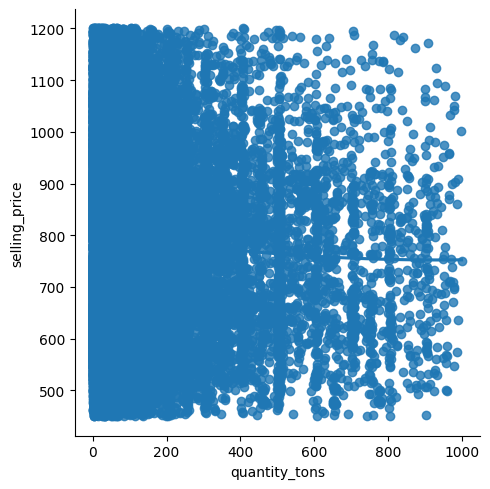

In [510]:
sns.lmplot(x ="quantity_tons", y ="selling_price", data = df, order = 2, ci = None)
plt.show()

In [511]:
df

,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,selling_price,material_ref_bias,delivery_days
0,54.151139,38,3,1,4,4,175.0,983.0,10043,21,854.00,1,91.0
1,768.024839,225,0,1,4,17,61.0,700.0,1451,19,1047.00,1,0.0
2,386.127949,29,4,1,5,12,15.0,443.0,14135,5,644.33,1,90.0
3,202.411065,664,5,1,3,21,193.0,806.0,10311,19,768.00,1,90.0
4,785.526262,303,3,1,4,4,301.0,1205.0,4119,8,577.00,1,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,106.783299,172,0,1,4,17,79.0,730.0,283,9,602.00,1,1.0
181668,102.482422,172,0,1,4,17,79.0,710.0,464,9,591.00,1,1.0
181669,208.086469,172,0,1,4,17,77.0,983.0,296,9,589.00,1,1.0
181670,4.235594,172,0,1,4,17,53.0,740.0,688,9,619.00,1,1.0


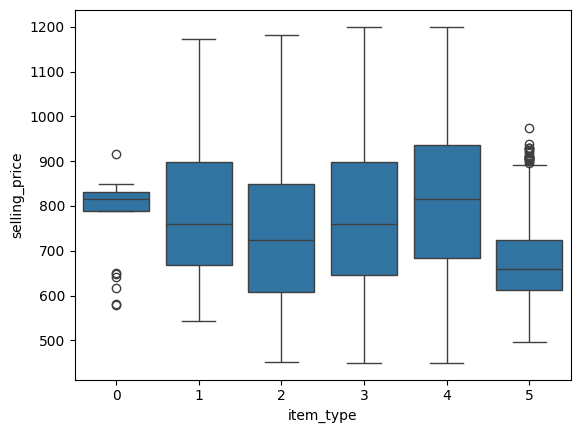

In [512]:
sns.boxplot(x='item_type',y='selling_price', data=df)
plt.show()

In [513]:
df.groupby('item_type').describe()

quantity_tons                                                 \
                  count        mean         std        min         25%   
item_type                                                                
0                  27.0    5.611950    2.942179   1.014466    3.032338   
1                 429.0  159.162882  165.883257   2.868219   71.185703   
2                3295.0  149.487204  221.132797   1.003576    6.109127   
3               23389.0   81.454116  117.073526   1.007845   27.557532   
4               53896.0   52.646174   95.505578   1.001021    8.033194   
5                 377.0  405.139857  239.901463  25.020837  225.980901   

                                              customer              ...  \
                  50%         75%         max    count        mean  ...   
item_type                                                           ...   
0            6.104485    7.571297   10.703031     27.0  445.962963  ...   
1          105.603320  154.338586  805.175042    429.0  341.808858  ...   
2           28.992821  208.124154  998.945375   3295.0  252.308649  ...   
3           35.889065   81.679647  999.870569  23389.0  334.596263  ...   
4           19.911784   55.343685  988.081415  53896.0  255.005733  ...   
5          371.628834  597.546872  965.256748    377.0  266.445623  ...   

          material_ref_bias      delivery_days                              \
                        75%  max         count       mean        std   min   
item_type                                                                    
0                       1.0  1.0          27.0  18.962963   2.941500  14.0   
1                       1.0  1.0         429.0  61.449883  43.632015   4.0   
2                       1.0  1.0        3295.0  46.265857  34.750097   0.0   
3                       1.0  1.0       23389.0  64.185942  38.678372   0.0   
4                       1.0  1.0       53896.0  54.407266  39.564187   0.0   
5                       1.0  1.0         377.0  15.596817  13.036846   1.0   

                                    
            25%   50%   75%    max  
item_type                           
0          15.0  20.0  21.0   23.0  
1          26.0  46.0  99.0  169.0  
2          18.0  37.0  68.0  215.0  
3          32.0  63.0  91.0  307.0  
4          22.0  46.0  80.0  585.0  
5           8.0  15.0  18.0   92.0  

[6 rows x 96 columns]

In [514]:
'''
df = df.drop(df[(df["item_type"] == 'WI') & (df["selling_price"] < float(450))].index)
df = df.drop(df[(df["item_type"] == 'WI') & (df["selling_price"] > float(890))].index)

df = df.drop(df[(df["item_type"] == 'PL') & (df["selling_price"] > float(1200))].index)

df = df.drop(df[(df["item_type"] == 'IPL') & (df["selling_price"] >= float(915))].index)
df = df.drop(df[(df["item_type"] == 'IPL') & (df["selling_price"] <= float(700))].index)
'''

'\ndf = df.drop(df[(df["item_type"] == \'WI\') & (df["selling_price"] < float(450))].index)\ndf = df.drop(df[(df["item_type"] == \'WI\') & (df["selling_price"] > float(890))].index)\n\ndf = df.drop(df[(df["item_type"] == \'PL\') & (df["selling_price"] > float(1200))].index)\n\ndf = df.drop(df[(df["item_type"] == \'IPL\') & (df["selling_price"] >= float(915))].index)\ndf = df.drop(df[(df["item_type"] == \'IPL\') & (df["selling_price"] <= float(700))].index)\n'

In [515]:
df


,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,selling_price,material_ref_bias,delivery_days
0,54.151139,38,3,1,4,4,175.0,983.0,10043,21,854.00,1,91.0
1,768.024839,225,0,1,4,17,61.0,700.0,1451,19,1047.00,1,0.0
2,386.127949,29,4,1,5,12,15.0,443.0,14135,5,644.33,1,90.0
3,202.411065,664,5,1,3,21,193.0,806.0,10311,19,768.00,1,90.0
4,785.526262,303,3,1,4,4,301.0,1205.0,4119,8,577.00,1,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,106.783299,172,0,1,4,17,79.0,730.0,283,9,602.00,1,1.0
181668,102.482422,172,0,1,4,17,79.0,710.0,464,9,591.00,1,1.0
181669,208.086469,172,0,1,4,17,77.0,983.0,296,9,589.00,1,1.0
181670,4.235594,172,0,1,4,17,53.0,740.0,688,9,619.00,1,1.0


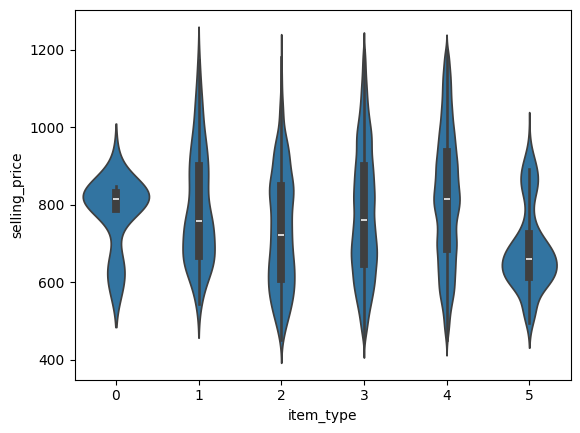

In [516]:
sns.violinplot(x='item_type',y='selling_price', data=df)
plt.show()

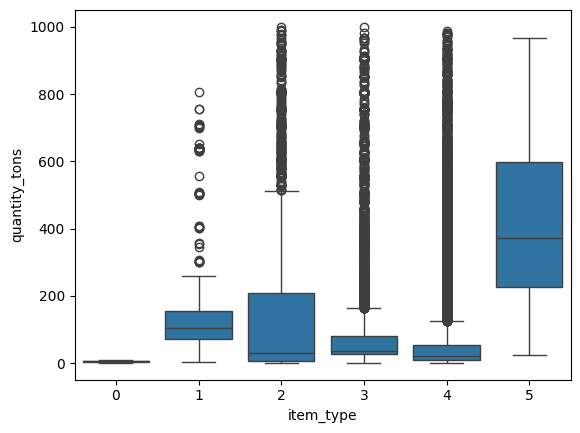

In [517]:
sns.boxplot(x='item_type',y='quantity_tons', data=df)
df = df.drop(df[(df["item_type"] == 'WI') & (df["quantity_tons"] < float(450))].index)
df = df.drop(df[(df["item_type"] == 'WI') & (df["quantity_tons"] > float(890))].index)
plt.show()

In [518]:
df = df.drop(df[(df["item_type"] == 'W') & (df["quantity_tons"] > float(190))].index)



df = df.drop(df[(df["item_type"] == 'WI') & (df["quantity_tons"] > float(1300))].index)

df = df.drop(df[(df["item_type"] == 'S') & (df["quantity_tons"] > float(200))].index)

df = df.drop(df[(df["item_type"] == 'PL') & (df["quantity_tons"] > float(700))].index)
#df = df.drop(df[(df["item_type"] == 'IPL') & (df["quantity_tons"] <= float(700))].index)
df = df.drop(df[(df["item_type"] == 'Others') & (df["quantity_tons"] <= float(400))].index)

df = df.drop(df[(df["item_type"] == 'WI') & (df["quantity_tons"] < float(450))].index)
df = df.drop(df[(df["item_type"] == 'WI') & (df["quantity_tons"] > float(890))].index)

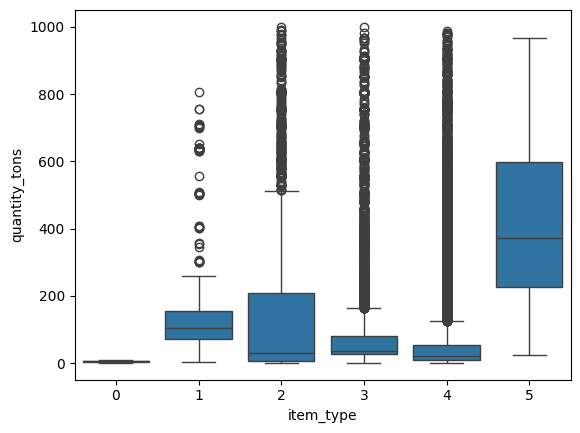

In [519]:
sns.boxplot(x='item_type',y='quantity_tons', data=df)
plt.show()

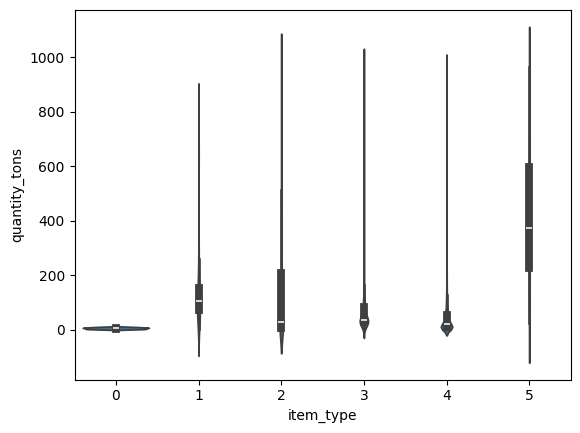

In [520]:
sns.violinplot(x='item_type',y='quantity_tons', data=df)
plt.show()

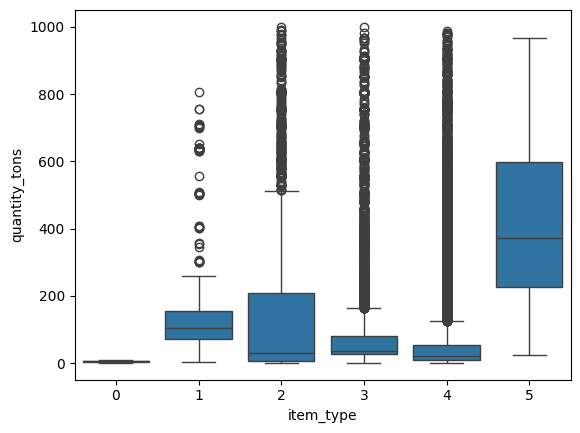

In [521]:
sns.boxplot(x='item_type',y='quantity_tons', data=df)
plt.show()

In [522]:
df.shape

(81413, 13)

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81413 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   quantity_tons      81413 non-null  float64
 1   customer           81413 non-null  int64  
 2   country            81413 non-null  int64  
 3   status             81413 non-null  int64  
 4   item_type          81413 non-null  int64  
 5   application        81413 non-null  int64  
 6   thickness          81413 non-null  float64
 7   width              81413 non-null  float64
 8   material_ref       81413 non-null  int64  
 9   product_ref        81413 non-null  int64  
 10  selling_price      81413 non-null  float64
 11  material_ref_bias  81413 non-null  int64  
 12  delivery_days      81413 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 8.7 MB


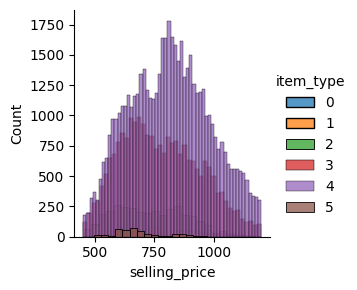

In [524]:
sns.FacetGrid(df, hue="item_type") \
   .map(sns.histplot, "selling_price") \
   .add_legend();
plt.show();

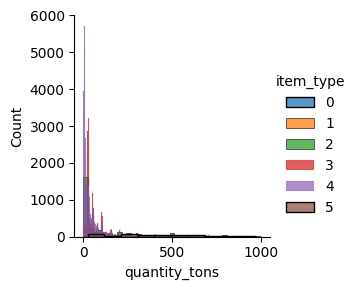

In [525]:
sns.FacetGrid(df, hue="item_type") \
   .map(sns.histplot, "quantity_tons") \
   .add_legend();
plt.show();

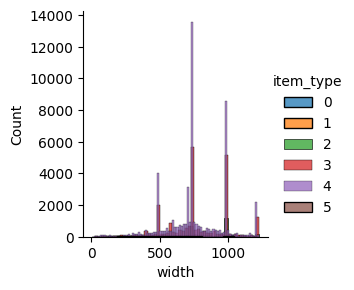

In [526]:
sns.FacetGrid(df, hue="item_type") \
   .map(sns.histplot, "width") \
   .add_legend();
plt.show();

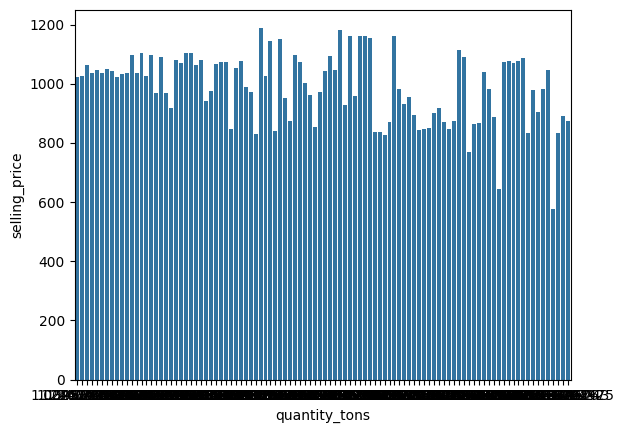

In [527]:
sns.barplot(x = 'quantity_tons',
            y = 'selling_price',
            data = df.head(100))

# Show the plot
plt.show()

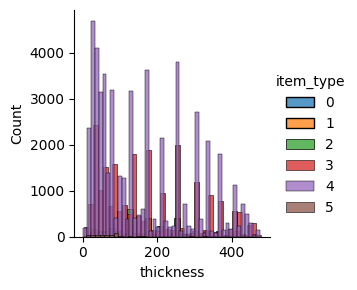

In [528]:
sns.FacetGrid(df, hue="item_type") \
   .map(sns.histplot, "thickness") \
   .add_legend();
plt.show();

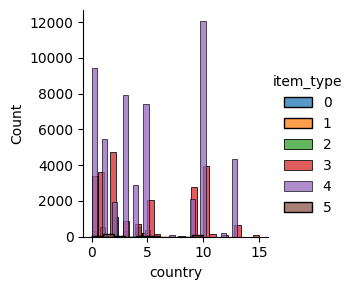

In [529]:
sns.FacetGrid(df, hue="item_type") \
   .map(sns.histplot, "country") \
   .add_legend();
plt.show();

In [530]:
df['status'] = df.pop('status') #moving selling_price to last column

In [531]:
'''
df.rename(columns= \
 {'customer': 'customer_LE', \
  'country': 'country_LE',\
  'item_type' : 'item_type_LE',\
  'application' : 'application_LE',\
  'thickness' : 'thickness_OE', \
  'width' : 'width_OE', \
  'material_ref' : 'material_ref_LE',
  'product_ref' : 'product_ref_LE',
  'status' : 'status_LE'

  }, inplace=True)
  '''

"\ndf.rename(columns=  {'customer': 'customer_LE',   'country': 'country_LE',  'item_type' : 'item_type_LE',  'application' : 'application_LE',  'thickness' : 'thickness_OE',   'width' : 'width_OE',   'material_ref' : 'material_ref_LE',\n  'product_ref' : 'product_ref_LE',\n  'status' : 'status_LE'\n\n  }, inplace=True)\n  "

In [532]:
df

,quantity_tons,customer,country,item_type,application,thickness,width,material_ref,product_ref,selling_price,material_ref_bias,delivery_days,status
0,54.151139,38,3,4,4,175.0,983.0,10043,21,854.00,1,91.0,1
1,768.024839,225,0,4,17,61.0,700.0,1451,19,1047.00,1,0.0,1
2,386.127949,29,4,5,12,15.0,443.0,14135,5,644.33,1,90.0,1
3,202.411065,664,5,3,21,193.0,806.0,10311,19,768.00,1,90.0,1
4,785.526262,303,3,4,4,301.0,1205.0,4119,8,577.00,1,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,106.783299,172,0,4,17,79.0,730.0,283,9,602.00,1,1.0,1
181668,102.482422,172,0,4,17,79.0,710.0,464,9,591.00,1,1.0,1
181669,208.086469,172,0,4,17,77.0,983.0,296,9,589.00,1,1.0,1
181670,4.235594,172,0,4,17,53.0,740.0,688,9,619.00,1,1.0,1


## **Normalization**

In [533]:
df.isnull().sum()

quantity_tons        0
customer             0
country              0
item_type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
selling_price        0
material_ref_bias    0
delivery_days        0
status               0
dtype: int64

In [534]:
scaler = MinMaxScaler()
#input param = array-like of shape (n_samples, n_features)
df_for_scalar = df.drop('status', axis = 'columns')

df_minmax_scaled = df.copy()
scaler.fit(df_for_scalar[df_for_scalar.columns])

minmaxscaler = scaler

df_minmax_scaled[df_for_scalar.columns] = scaler.transform(df_for_scalar[df_for_scalar.columns])

# view normalized data
display(df_minmax_scaled)


,quantity_tons,customer,country,item_type,application,thickness,width,material_ref,product_ref,selling_price,material_ref_bias,delivery_days,status
0,0.053210,0.048469,0.200000,0.8,0.137931,0.364780,0.802126,0.634990,0.750000,0.538667,0.0,0.155556,1
1,0.767892,0.286990,0.000000,0.8,0.586207,0.125786,0.570728,0.091743,0.678571,0.796000,0.0,0.000000,1
2,0.385563,0.036990,0.266667,1.0,0.413793,0.029350,0.360589,0.893715,0.178571,0.259107,0.0,0.153846,1
3,0.201638,0.846939,0.333333,0.6,0.724138,0.402516,0.657400,0.651935,0.678571,0.424000,0.0,0.153846,1
4,0.785413,0.386480,0.200000,0.8,0.137931,0.628931,0.983647,0.260432,0.285714,0.169333,0.0,0.052991,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0.105902,0.219388,0.000000,0.8,0.586207,0.163522,0.595258,0.017893,0.321429,0.202667,0.0,0.001709,1
181668,0.101596,0.219388,0.000000,0.8,0.586207,0.163522,0.578904,0.029337,0.321429,0.188000,0.0,0.001709,1
181669,0.207320,0.219388,0.000000,0.8,0.586207,0.159329,0.802126,0.018715,0.321429,0.185333,0.0,0.001709,1
181670,0.003238,0.219388,0.000000,0.8,0.586207,0.109015,0.603434,0.043500,0.321429,0.225333,0.0,0.001709,1


Covariance Matrix:
                    quantity_tons  customer   country  application  thickness  \
quantity_tons           0.013443  0.002388 -0.001386     0.002518  -0.000408   
customer                0.002388  0.071417  0.004734     0.004536   0.006502   
country                -0.001386  0.004734  0.078342    -0.002902  -0.009093   
application             0.002518  0.004536 -0.002902     0.056841  -0.012235   
thickness              -0.000408  0.006502 -0.009093    -0.012235   0.068116   
width                   0.000038  0.001650  0.001825    -0.008711   0.015917   
material_ref           -0.000511 -0.005771  0.016635    -0.000515   0.001887   
product_ref             0.000429 -0.002945 -0.011376    -0.011269   0.026471   
selling_price          -0.001451  0.000766  0.002411     0.009405  -0.023516   
material_ref_bias       0.000000  0.000000  0.000000     0.000000   0.000000   
delivery_days          -0.000060 -0.000172 -0.004006    -0.003288   0.002639   
status              

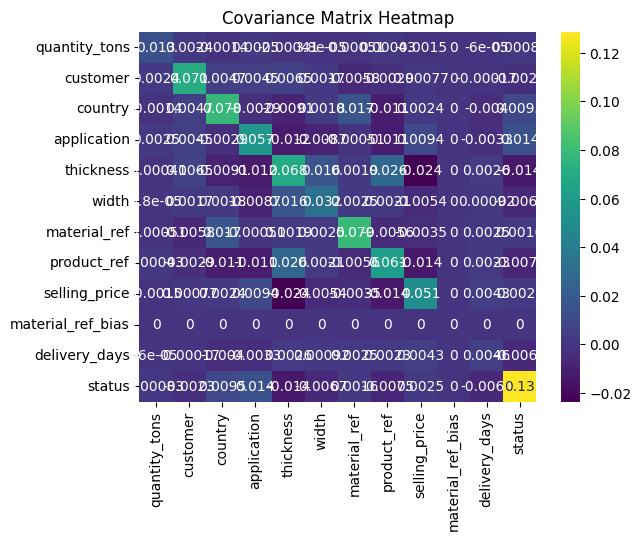

In [535]:
cov_matrix = df_minmax_scaled.drop(['item_type'], axis=1).cov()

# Display covariance matrix
print("Covariance Matrix:\n", cov_matrix)

# Heatmap for visualization
sns.heatmap(cov_matrix, annot=True, cmap='viridis')
plt.title('Covariance Matrix Heatmap')
plt.show()

In [536]:
df_minmax_scaled.skew().sort_values(ascending=False)

quantity_tons        3.876727
product_ref          0.792068
customer             0.745369
delivery_days        0.646547
thickness            0.646380
country              0.482957
application          0.375064
selling_price        0.182301
material_ref_bias    0.000000
width               -0.246030
material_ref        -0.274916
item_type           -1.387851
status              -1.943265
dtype: float64

In [537]:
df_minmax_scaled.to_csv("df_minmax_scaled_forwonloss.csv",index=False)

In [538]:
df_minmax_scaled

,quantity_tons,customer,country,item_type,application,thickness,width,material_ref,product_ref,selling_price,material_ref_bias,delivery_days,status
0,0.053210,0.048469,0.200000,0.8,0.137931,0.364780,0.802126,0.634990,0.750000,0.538667,0.0,0.155556,1
1,0.767892,0.286990,0.000000,0.8,0.586207,0.125786,0.570728,0.091743,0.678571,0.796000,0.0,0.000000,1
2,0.385563,0.036990,0.266667,1.0,0.413793,0.029350,0.360589,0.893715,0.178571,0.259107,0.0,0.153846,1
3,0.201638,0.846939,0.333333,0.6,0.724138,0.402516,0.657400,0.651935,0.678571,0.424000,0.0,0.153846,1
4,0.785413,0.386480,0.200000,0.8,0.137931,0.628931,0.983647,0.260432,0.285714,0.169333,0.0,0.052991,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0.105902,0.219388,0.000000,0.8,0.586207,0.163522,0.595258,0.017893,0.321429,0.202667,0.0,0.001709,1
181668,0.101596,0.219388,0.000000,0.8,0.586207,0.163522,0.578904,0.029337,0.321429,0.188000,0.0,0.001709,1
181669,0.207320,0.219388,0.000000,0.8,0.586207,0.159329,0.802126,0.018715,0.321429,0.185333,0.0,0.001709,1
181670,0.003238,0.219388,0.000000,0.8,0.586207,0.109015,0.603434,0.043500,0.321429,0.225333,0.0,0.001709,1


## Model Training & Evaluation


In [539]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score

from pickle import dump
import joblib

In [540]:
X = df.drop('status', axis = 1)
Y = df['status']



X_train,X_test,y_train,y_test = train_test_split(X,Y)

In [541]:
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)

  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  train_score = f1_score(y_train, train_y_pred)
  test_score = f1_score(y_test, test_y_pred)

  print(f'Training F1 score:{train_score}, Testing F1 score:{test_score}')

  cm = confusion_matrix(y_test, test_y_pred)
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 10

  probability = model.predict_proba(X_test)  #predict_proba gives two column 0s and 1s
  probabilites = probability[:,1]
  roc_auc_score(y_test,probabilites)

  print(f'True Positive Rate :{cm_normalized[0][0]}')
  print(f'True Negative Rate :{cm_normalized[1][1]}')
  print(f'False Positive Rate :{cm_normalized[0][1]}')
  print(f'False Negative Rate :{cm_normalized[1][0]}')

  #return train_score,test_score

In [542]:
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.ensemble import BalancedBaggingClassifier
import xgboost+ as xgb

base_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
bbc = BalancedBaggingClassifier(estimator=base_classifier,
                                 n_estimators=50,
                                 random_state=42)
#clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
#training(clf,X_train, y_train,X_test,y_test)

#bbc = BalancedBaggingClassifier(random_state=42)
training(bbc,X_train, y_train,X_test,y_test)

#probability = clf.predict_proba(X_test)  #predict_proba gives two column 0s and 1s
#probabilites = probability[:,1]
#print(f'roc auc score:{roc_auc_score(y_test,probabilites)}')



c:\Users\ashfaq.ahamed\Documents\projects1\ICM\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ashfaq.ahamed\Documents\projects1\ICM\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ashfaq.ahamed\Documents\projects1\ICM\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.w

Training F1 score:0.965975433885325, Testing F1 score:0.9564043325632332
True Positive Rate :9.52733118971061
True Negative Rate :9.242635119461841
False Positive Rate :0.472668810289389
False Negative Rate :0.7573648805381582


In [543]:
le

LabelEncoder()

In [544]:
#joblib.dump(clf, 'clf.pkl')
#joblib.dump(bbc, 'bbc.pkl')
#joblib.dump(minmaxscaler, 'scaler.pkl')
#joblib.dump(label_encoders, 'le.pkl')
#joblib.dump(ordinal_encoders, 'oe.pkl')

In [545]:
#loaded_clf = joblib.load('clf.pkl')
#loaded_clf = joblib.load('bbc.pkl')
#loaded_scaler = joblib.load('scaler.pkl')
#loaded_le = joblib.load('le.pkl')
#loaded_oe = joblib.load('oe.pkl')

In [546]:
import pickle
with open('bbc.pkl', 'wb') as f:
    pickle.dump(bbc, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(minmaxscaler, f)

with open('le.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

with open('oe.pkl', 'wb') as f:
    pickle.dump(ordinal_encoders, f)


In [547]:
with open(r'C:\Users\ashfaq.ahamed\Documents\projects1\ICM\bbc.pkl', 'rb') as f:
    loaded_bbc = pickle.load(f)

with open(r'C:\Users\ashfaq.ahamed\Documents\projects1\ICM\scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

with open(r'C:\Users\ashfaq.ahamed\Documents\projects1\ICM\le.pkl', 'rb') as f:
    loaded_le = pickle.load(f)

with open(r'C:\Users\ashfaq.ahamed\Documents\projects1\ICM\oe.pkl', 'rb') as f:
    loaded_oe = pickle.load(f)

In [548]:
input = ['400', '30156308.0'	, 28.0, 'IPL', 10.0,2.0,1500.0,'35370633AHCUS3ATL',640405, 5000.0, 1, 30]
input_data = pd.DataFrame(columns = X_test.columns)
input_data.loc[0] = input
input_data

,quantity_tons,customer,country,item_type,application,thickness,width,material_ref,product_ref,selling_price,material_ref_bias,delivery_days
0,400,30156308.0,28.0,IPL,10.0,2.0,1500.0,35370633AHCUS3ATL,640405,5000.0,1,30


In [549]:
for col in le_col:
  input_data[col] = loaded_le[col].transform([input_data[col]])

for col in oe_col:
  input_data[col] = loaded_oe[col].transform([input_data[col]])

input_data[input_data.columns] = loaded_scaler.transform(input_data[input_data.columns])


#val1 = clf.predict(INDF)
val1 = bbc.predict(input_data)

print(f' For the given INDF data, the predicted PO status would be {val1[0]}')
print(type(val1))

 For the given INDF data, the predicted PO status would be 1
<class 'numpy.ndarray'>


c:\Users\ashfaq.ahamed\Documents\projects1\ICM\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\ashfaq.ahamed\Documents\projects1\ICM\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\ashfaq.ahamed\Documents\projects1\ICM\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\ashfaq.ahamed\Documents\projects1\ICM

# **Test**

In [550]:
loaded_le['item_type'].classes_

array(['IPL', 'Others', 'PL', 'S', 'W', 'WI'], dtype=object)

In [551]:
le_col_val['item_type']['IPL']

np.int64(0)

In [552]:
L1 = le_col_val['item_type'].keys()

In [553]:
L1

dict_keys(['IPL', 'Others', 'PL', 'S', 'W', 'WI'])

In [554]:
import pickle 

with open('le_col_val.pkl', 'wb') as f:
    pickle.dump(le_col_val, f)

with open('oe_col_val.pkl', 'wb') as f:
    pickle.dump(mapping, f)
        

In [555]:
mapping['width']

{np.float64(20.5): 0,
 np.float64(29.0): 1,
 np.float64(40.0): 2,
 np.float64(54.0): 3,
 np.float64(70.0): 4,
 np.float64(82.5): 5,
 np.float64(84.0): 6,
 np.float64(89.7): 7,
 np.float64(100.5): 8,
 np.float64(101.5): 9,
 np.float64(105.0): 10,
 np.float64(112.0): 11,
 np.float64(115.0): 12,
 np.float64(120.0): 13,
 np.float64(125.0): 14,
 np.float64(128.8): 15,
 np.float64(129.5): 16,
 np.float64(131.5): 17,
 np.float64(160.0): 18,
 np.float64(162.0): 19,
 np.float64(172.5): 20,
 np.float64(177.0): 21,
 np.float64(179.5): 22,
 np.float64(188.0): 23,
 np.float64(195.0): 24,
 np.float64(196.3): 25,
 np.float64(197.0): 26,
 np.float64(198.0): 27,
 np.float64(203.5): 28,
 np.float64(209.0): 29,
 np.float64(209.5): 30,
 np.float64(210.0): 31,
 np.float64(212.0): 32,
 np.float64(217.3): 33,
 np.float64(220.0): 34,
 np.float64(223.0): 35,
 np.float64(227.0): 36,
 np.float64(230.0): 37,
 np.float64(232.0): 38,
 np.float64(233.0): 39,
 np.float64(234.0): 40,
 np.float64(234.8): 41,
 np.float6